# Exploratory Data Analysis

Importing libraries.

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import datetime
import calendar
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns

Importing `csv` file.

In [3]:
df = pd.read_csv('ckd.csv')

Finding co-relation between columns.

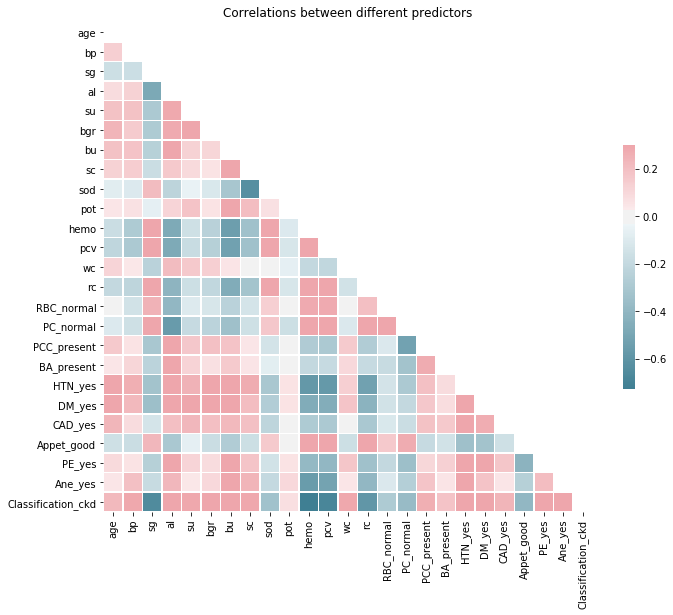

In [4]:
corr_df = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.show()

We can see from the heat map that 'hemo' , 'pcv' are columns with lowest numerical value and 'bu' have highest numerical value in columns in our datset.

In [5]:
df1 = pd.read_csv('kidney_disease.csv')

We have lots of data in our dataset which have boolean values. Let's plot graph for every other column showing their count.

In [6]:
df1.shape

(400, 26)

In [7]:
df1.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

**Red Blood Cell**

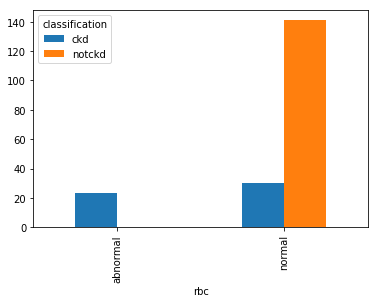

In [8]:
d = df1.groupby(['rbc', 'classification']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

Patients with abnormal red blood cell will suffer from kidney disease. There are chances of having kidney disease even if you have normal red blood cell count.

**Packed Cell**

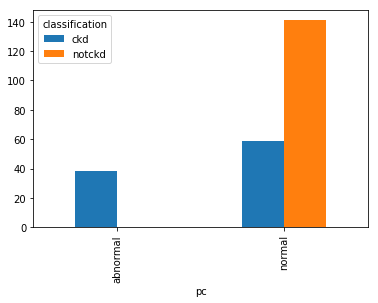

In [9]:
d = df1.groupby(['pc', 'classification']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

Patients with abnormal packed cell are prone to kidney disease. There are chances of having kidney disease even if you have normal packed cell count.

**Prothombin Complex Concentrate**

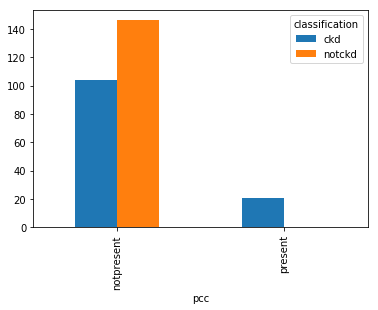

In [10]:
d = df1.groupby(['pcc', 'classification']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

People who lack Prothombin Complex Concentrate have less chances of gettin kidney disease and people who have Prothombin Complex Concentrate have high chances of getting kidney disease. But in our dataset, there are more entries of people not having Prothombin Complex Concentrate.

**Barium**

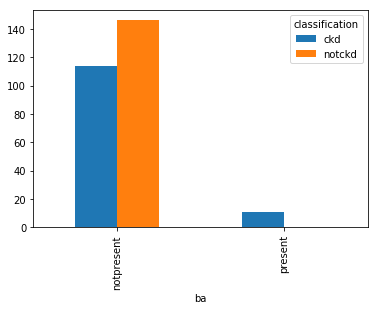

In [11]:
d = df1.groupby(['ba', 'classification']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

People who lack barium have less chances of gettin kidney disease and people who have barium have high chances of getting kidney disease. But in our dataset, there are more entries of people not having barium.

**Hypertension**

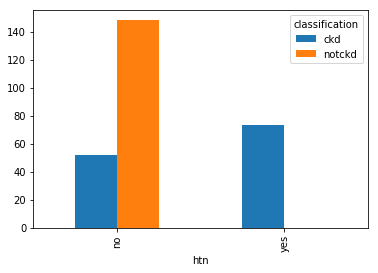

In [12]:
d = df1.groupby(['htn', 'classification']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

People who have hypertension, they will have kidney disease. People who don't have hypertension have chances of having kidney disease.

**Diabetes Mellitus**

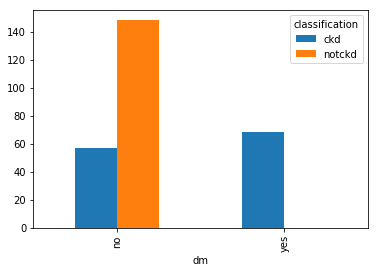

In [13]:
d = df1.groupby(['dm', 'classification']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

People who lack diabetes mellitus have less chances of getting kidney disease. People who have diabetes mellitus have very hugh chances of getting kidney disease.

**Coronary Artery Disease**

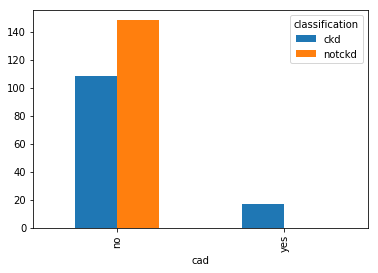

In [14]:
d = df1.groupby(['cad', 'classification']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

People who have coronary artery disease have very high chances of getting kidney disease. People who don't have coronary artery disease have less chance of getting kidney disease.

**Appetite**

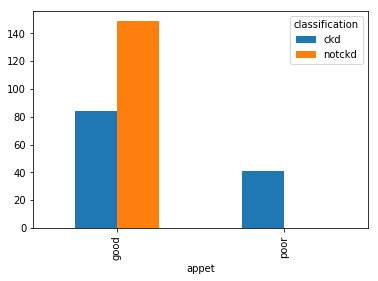

In [15]:
d = df1.groupby(['appet', 'classification']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

People with poor appetite have more chances of getting kidney disease but from our dataset, we came to understand that people having good appetite can also have kidney disease as we have more entries of this type of data.

**Pulmonary Embolism**

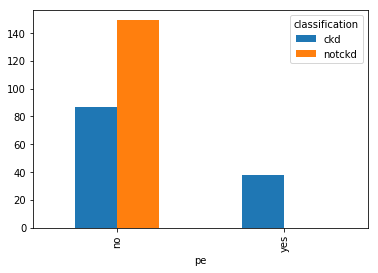

In [16]:
d = df1.groupby(['pe', 'classification']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

People with pulmonary disease have very high chance of getting kidney disease but from our dataset, we understood that people without pulmonary embolism can also have kidney desease as we have higher entries of this type of data.

**Audible Nasal Emission**

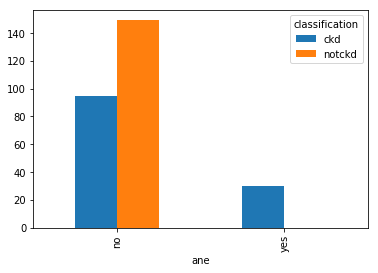

In [17]:
d = df1.groupby(['ane', 'classification']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

People with audible nasal emission have very high chance of getting kidney disease but from our dataset, we understood that people without audible nasal emission can also have kidney desease as we have higher entries of this type of data.

**Disease detected or not**

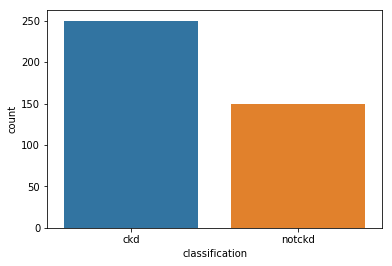

In [18]:
classi = pd.DataFrame(df1.groupby('classification').size()).idxmax()[0]
df1['classification'] = df1['classification'].fillna(classi)
sns.countplot(data=df1,x='classification')

In [19]:
df1['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In our dataset, we have 250 entries with disease and 150 without disease. So, there is good balance in data in 2 outcomes. Thus, no need for oversample/undersample the data to train the model. 

EDA is also continued in Tableau. Link for them are mentioned below.

https://public.tableau.com/profile/nitin.prince.reuben#!/vizhome/EDA_1_2/Story1?publish=yes

Column names and it's full forms.

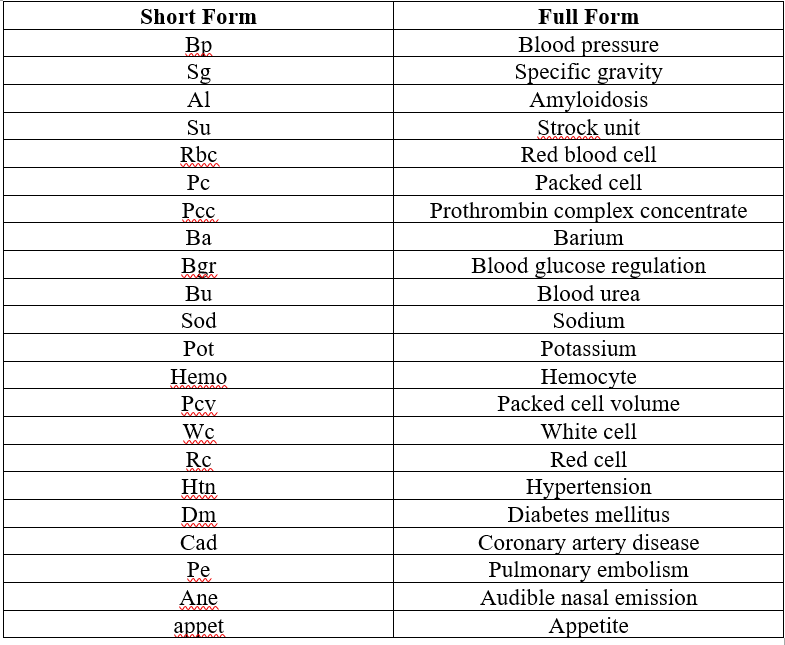